___
# <font color=#00FF77> CMSE 830</font>
## <font color=#00FF88> HW #4</font>

____



### Name: Rohan Ponramesh

____
![kde](https://blogs.sas.com/content/iml/files/2016/07/kdecomponents1.png)

## Problem #1 (10pts):
### KDE and Rug Plots (from scratch!)

You are earning some extra money working in a restaurant while you complete your data science degree. In a conversation with other employees, the topic of tips comes up: do people tip 15% or 20%? An "argument" breaks out before you interrupt and point out that there is a distribution of tips, not a fixed value. In fact, you propose that the distribution of tips is normally distributed. To your surprise, you learn that one of the waitresses is also a data scientist student who points out that there is no reason to believe that the distribution of tips is normal and that the mean and standard deviation have any meaning. You propose to answer these questions by building a KDE of tip data!

✍🏻 For this problem, do **not** use a library to compute the KDE - do it yourself using basic Python. Your plot will be similar to the one above. Follow these steps:
* get the standard "tips" dataset (which is in Seaborn)
* compute the percentage tip from the data, and store those values in an array
* in `matplotlib`, plot a vertical line from 0 to 1 for each tip percentage (there are many ways to do this, but an easy way is to use [`vlines`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)); you should have a vertical line marking each percentage tip in the dataset
* adjust the figure so that you can view the data well, perhaps using something like `plt.figure(figsize=(20,5))`
* from this plot, do you think that tips are normally distributed? why or why not?
* write a function called `my_kde` that reads in three variables: the _x_ values you want to plot over (perhaps use `linspace` over the range of percentage tip), the array of percent tips _p_ you computed above and the width _w_ of the kernel; make your kernel have the form $$K(x,p) = \exp(-(x - p)^2/2w^2)/(w\sqrt{2\pi})$$ and return the [sum of the kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation) over all of the tip percentages (note that this will be an array over the _x_ values)
* plot your kde with the vertical lines you produced above - note that the vertical lines (if you made them from _0_ to _1_) will be a rug plot,
* make several plots with different values of the width _w_ (perhaps in the range _0.2_ to _6_); which value of _w_ is best?
* using NumPy, compute the mean and standard deviation of the percent tips, construct a normal distribution from those values and add that to your plot: this is the best normal distribution the data suggests and it many or may not look like the KDE (hint: `plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))`)
* if you make your width _w_ too large, does the KDE predict anything impossible?
* finally, answer the question: do you think this is a normal distribution? Would you arrive at a different conclusion depending on which width _w_ you pick? What is your conclusion to the original conversation in the restaurant? Do you see outliers? (Put discussion in a markdown cell.)



_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._


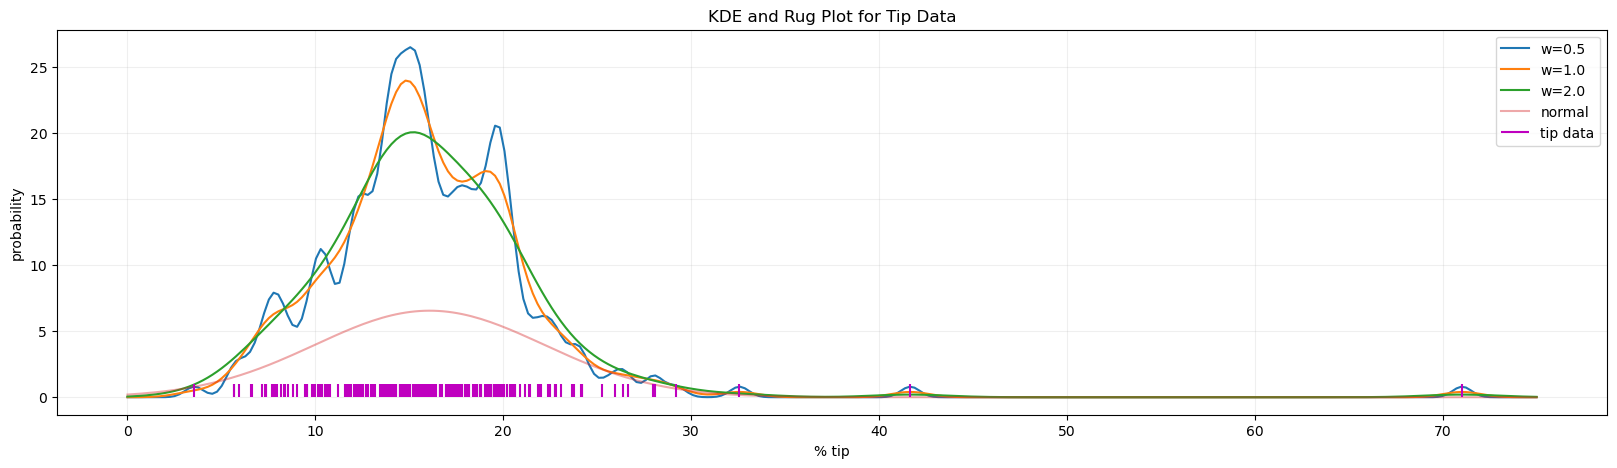

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

df = sns.load_dataset("tips")
tip_perc = np.array(df["tip"]/df["total_bill"])*100


# my_kde function takes the x_vals and tips and estimates the kernel density for the given width

def my_kde(x_vals, tips, width):
    kde = np.zeros(len(x_vals))
    for tip in tips:
        kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)
    return kde

x_vals = np.linspace(0,75, 300)

# the values y for plottig the normal distribution for each x_vals
y_vals_calulated=100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi))


plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label="w=0.5")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label="w=1.0")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label="w=2.0")
plt.plot(x_vals, y_vals_calulated,alpha = 0.4, label='normal')

# rug plot
plt.vlines(tip_perc, 0, 1, 'm', label='tip data')

plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% tip")
plt.ylabel("probability")
plt.legend()


In [2]:
mean = np.mean(tip_perc)
std_dev= np.std(tip_perc)

#assuming the outliers are the above and below the threshold 3*std from the mean

threshold = 3 * std_dev

outliers = tip_perc[((tip_perc > mean + threshold)|(tip_perc < mean - threshold))]
print(outliers)

[71.03448276 41.66666667]


> from the kernel desnity functions values plotted with different width shows us that its the structure of a normal curve and we could see the outliers fo the tips in the given data would be the tips over  40

____
![project](https://miro.medium.com/max/1400/1*xf7i-aJrlKahzzfiM7Pxfw.png)
## Problem #2 (10pts)

### <font color=#839383>_choosing a topic for your project_</font>

We are $\frac{1}{4}$ done with the semester, which means we are $\frac{1}{2}$ way to your midterm project.

Your project should contain many technical, coding and visualization details. But, what is much more important is that there is a story. This week we will work on the story.

Last week you examined several datasets that might be useful for your project. For this HW problem, you can use what you did last week; or, this is the time to choose different datasets if you didn't find last week's interesting or useful. After this week, you should decide on a dataset and stick with it at least through the midterm project.


✍🏻 In a markdown cell below, answer these questions:
* from a set of at least three datasets, discuss what they reveal to you,
* what is interesting about these datasets from a science point of view?,
* what is interesting about these datasets from a _data_ science point of view?
* you will create a web app in Streamlit, placed at GitHub: what would a web app do for each of the datasets?,
* you are not the user of your web app - you are creating it for someone you will never meet: what do you want them to get from the web app for each of these dataset?

Based on these steps, which of the datasets is the more interesting to you for your project and why?

The goal is for you to decide on a topic and know that it will be usable. Very often we have a project in mind for which there is no dataset available that allows us to do what we want. This is the time to ensure, through EDA on several datasets, that our project is realistic.

If you choose one of the more common and simple datasets, such as MPG, Penguin or Iris, you need to have a very compelling reason for your choice. There is already a lot known on the web about these datasets and there is very little new you can do with them. 

The three repos i used for the last HW are 


1. **Bank Marketing Dataset from UCI ML Repo**:
   - **Scientific Perspective**: This dataset contains information related to a marketing campaign for a bank. From a scientific point of view, it offers insights into consumer behavior and responses to marketing strategies. Researchers can analyze factors that influence the success of marketing campaigns, customer segmentation, and the impact of various attributes on subscription rates.
   - **Data Science Perspective**: Data scientists can use this dataset for various tasks, including classification (predicting whether a client will subscribe to a term deposit), feature engineering (identifying relevant features for prediction), and customer segmentation. It provides a real-world scenario for practicing classification and marketing analytics.
   - **Webapp**: The webapp would be a realtime application for variation in different aspect of the banking data parameters to analyse the success of the banking marketing campaign.
   - **User Perspective**: the webapp could act as an dashboard for marketing analyst to best acheive their targets by making specific marketing decision.

2. **Rice (Cammeo and Osmancik) from UCI ML Repo**:
   - **Scientific Perspective**: Datasets related to agriculture, such as rice structure and shape, are crucial for agricultural research. These datasets can be used to study factors affecting the gentics of the rice. Researchers can use this data to develop strategies for improving crop yields and ensuring food security.
   - **Data Science Perspective**: Data scientists can analyze these datasets to build predictive models for crop yields based on various features like weather conditions, soil properties, and farming practices. It's an opportunity to work on regression and time series analysis, which are common in agricultural data science.
   - **Webapp**: The webapp would be a realtime application for variation in different aspect of the rice data parameters.
   - **User Perspective**: the webapp could be a analytic tool to researches to study the species of rice and which, which parameter affect the rice in general and try to acheive in creating better version of the deirable rice.

3. **ILPD (Indian Liver Patient Dataset) from UCI ML Repo**:
   - **Scientific Perspective**: This dataset contains information about liver patients in India, including health parameters and whether they have liver disease. From a scientific perspective, it can be valuable for understanding the factors that contribute to liver diseases, conducting epidemiological studies, and developing healthcare strategies.
   - **Data Science Perspective**: Data scientists can apply classification algorithms to predict whether a patient has liver disease based on the provided health data. They can also perform feature selection to identify the most important factors affecting liver health. This dataset allows for practicing medical data analysis, which is important in healthcare data science.
   - **Webapp**: The webapp would be a realtime application for variation in different aspect of the patients data parameters to analyse the patients trend in their recovery or condition.
   - **User Perspective**: the webapp could act as an analytic tool to a doctor with additional parameters added to acheive best diagnois and prognosis of the patient to treat them before the severity increases.



____
![project](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)
## Problem #3 (5pts)

### <font color=#839383>more on Streamlit</font>

From the previous problem, choose your favorite dataset - the one you are liking to use for the midterm project. Build that into a very simple Streamlit app.

Do that by watching this video. Follow the video and build a web app as you are watching, but using the dataset you chose from the previous problem.

The goal is that you start to connect the narrative associated with the data to what the purpose of the web app might be.

If you are having any trouble with deploying Streamlit, please contact us on Slack.


> For the midterm project i am utilizing the dataset from kaggle, the data of death rate and their causes

>  Data https://www.kaggle.com/datasets/bilalwaseer/death-rate-of-countries-and-its-causes/data

> web app https://ica-hw4.streamlit.app

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/rohanramesh38/CMSE-830/main/4_HW/death_rate_and_causes.csv')


In [4]:
df.head()

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alochol use,Diet low in fruits,Unsafe water source,...,High body mass index,Unsafe sanitation,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [5]:
df.describe()


,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alochol use,Diet low in fruits,Unsafe water source,Secondhand smoke,Low birth weight,...,High body mass index,Unsafe sanitation,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
count,6840.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,...,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,8.458244e+04,2.242249e+05,4.049716e+04,3.869129e+04,5.484860e+04,2.395776e+04,4.408638e+04,3.036401e+04,5.912551e+04,...,8.986992e+04,3.152155e+04,2.179989e+04,10285.202047,8182.473246,2471.594444,11164.329678,431.456725,7171.853070,1421.363596
std,8.656074,3.511973e+05,8.634691e+05,1.752832e+05,1.479084e+05,2.112090e+05,9.451573e+04,2.020493e+05,1.222861e+05,2.502265e+05,...,3.450420e+05,1.463434e+05,9.668259e+04,39960.745145,32403.922936,12718.303403,52866.245579,1901.531732,31678.447189,6303.931822
min,1990.000000,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,4.337500e+02,1.827750e+03,1.370000e+02,2.737500e+02,2.637500e+02,1.440000e+02,7.000000e+00,2.090000e+02,1.230000e+02,...,9.185000e+02,3.000000e+00,1.900000e+01,31.000000,43.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,2004.500000,2.101000e+03,8.770500e+03,9.695000e+02,1.444000e+03,1.780500e+03,8.345000e+02,1.825000e+02,9.940000e+02,1.057000e+03,...,3.917000e+03,1.020000e+02,2.210000e+02,222.000000,277.000000,2.000000,41.500000,4.000000,60.500000,12.000000
75%,2012.000000,1.181025e+04,4.035550e+04,5.169750e+03,6.773250e+03,8.368000e+03,3.104750e+03,5.599250e+03,4.347750e+03,1.090325e+04,...,1.796775e+04,3.854000e+03,3.953500e+03,1224.250000,1232.000000,230.250000,1563.250000,71.250000,1315.500000,238.000000
max,2019.000000,4.506193e+06,1.084560e+07,1.885356e+06,1.844836e+06,2.441973e+06,1.046015e+06,2.450944e+06,1.304318e+06,3.033425e+06,...,5.019360e+06,1.842275e+06,1.200349e+06,494492.000000,437884.000000,207555.000000,833449.000000,33106.000000,505470.000000,73461.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Entity                                    6840 non-null   object
 1   Code                                      6150 non-null   object
 2   Year                                      6840 non-null   int64 
 3   Outdoor air pollution                     6840 non-null   int64 
 4   High systolic blood pressure              6840 non-null   int64 
 5   Diet high in sodium                       6840 non-null   int64 
 6   Diet low in whole grains                  6840 non-null   int64 
 7   Alochol use                               6840 non-null   int64 
 8   Diet low in fruits                        6840 non-null   int64 
 9   Unsafe water source                       6840 non-null   int64 
 10  Secondhand smoke                          6840 n

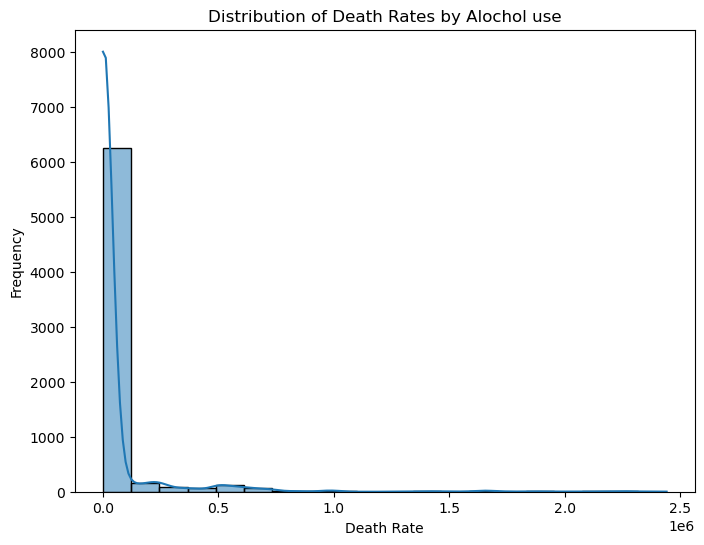

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Alochol use'], bins=20, kde=True)
plt.xlabel('Death Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Death Rates by Alochol use')
plt.show()


In [8]:
country_mean = df.groupby('Entity')['Iron deficiency'].mean().reset_index()
country_mean

,Entity,Iron deficiency
0,Afghanistan,875.400000
1,African Region (WHO),21561.666667
2,Albania,1.200000
3,Algeria,159.333333
4,American Samoa,0.000000
...,...,...
223,World Bank Lower Middle Income,39563.200000
224,World Bank Upper Middle Income,3798.900000
225,Yemen,535.666667
226,Zambia,229.466667


/var/folders/rw/0tvxrjxd6xgg15ts3dc0z8p80000gn/T/ipykernel_7057/1362821234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


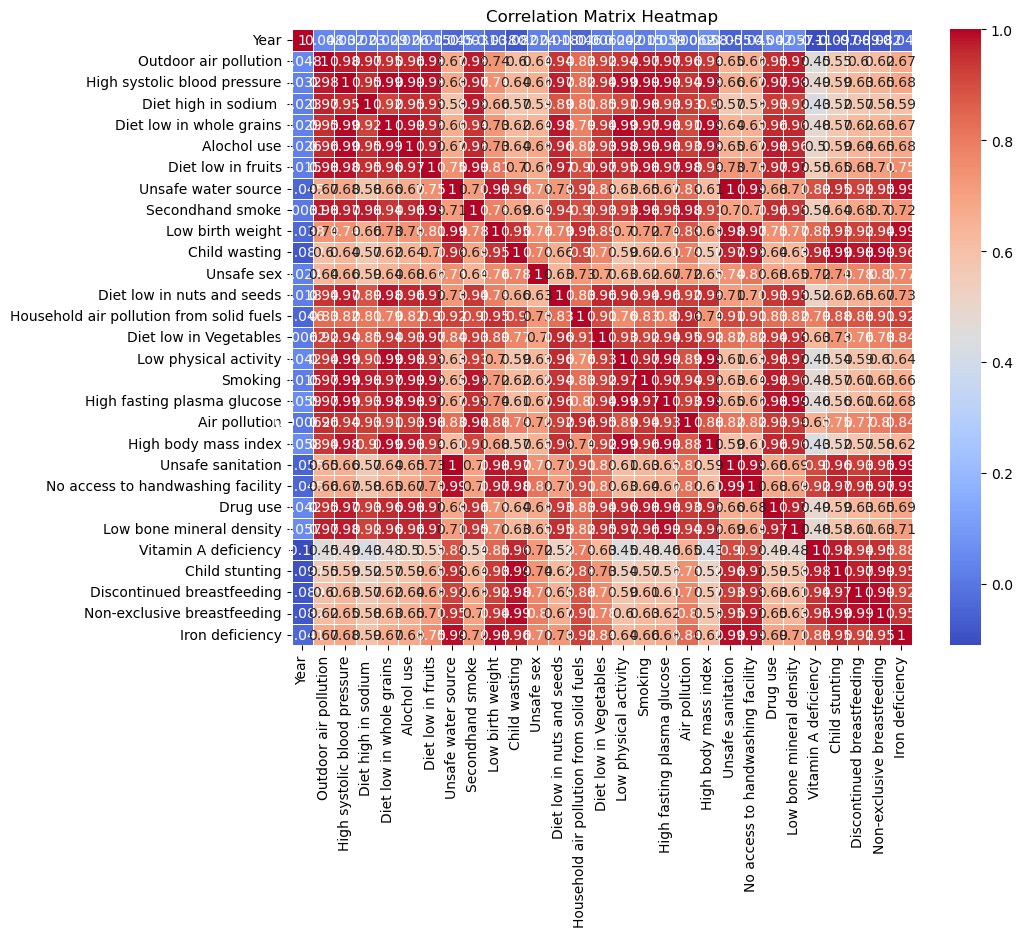

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


> streamlit link [webapp](https://ica-hw4.streamlit.app)

In [10]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_Um12_OlGgw?si=pYR7WmeChe7Xxpq5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


____
![impute](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60128/versions/2/screenshot.jpg)
## Problem #4 (10pts)
### missingness and imputation

✍🏻 Open a markdown cell and answer these questions:
1. define "imputation" in your own words,
2. what is "listwise deletion" and what are two potential problems with using it?
3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have?
4. define "missingness",
5. what are the three main types of missingness?
6. how is multiple imputation implemented?
7. what is mean substitution, and what can go wrong?
8. what is regression substitution, and what does it miss?
9. what problem does stochastic regression solve?
10. rank from best to worst: MAR, MCAR, MNAR


> 1) most of the real-world dataset would have missing values in a dataset, imputation is filling/substituting missing data based on  some statistical techniques, by doing so minimising the impact of missing data

> 2. handling missing data by removing entire row from the dataset if they contain any missing values is called listwise deletion 
> * Loss of Data: It can result in a significant loss of data, reducing the sample size and potentially affecting the representativeness of the remaining data.
> * Biased Results: If the missing data is not completely at random (MCAR), listwise deletion can lead to biased results and invalid inferences.

> 3. handling missing data where each analysis involves only the variables with available data for that specific analysis. It is different from listwise deletion as it retains cases with missing data for some variables while omitting them for others
> * Inconsistent Sample Sizes: Different analyses may involve different subsets of the data, making it challenging to compare results consistently across analyses.
> * Bias in Covariance Estimates: Pairwise deletion can lead to biased estimates of covariance and correlations if the missing data is not missing completely at random.

> 4. Missingness refers to the condition where data values are absent or unavailable for specific observations or variables in a dataset

> 5. three types of missingness are
> * **Missing Completely at Random (MCAR)**: The probability of data being missing is unrelated to both observed and unobserved data. Missingness is random.
> * **Missing at Random (MAR)**: The probability of data being missing may depend on observed data but not on unobserved data. Missingness is systematic but can be predicted using observed data.
> * **Missing Not at Random (MNAR)**: The probability of data being missing depends on unobserved data or factors that are not part of the dataset. Missingness is related to the missing values themselves.

> 6. Multiple imputation is a technique for handling missing data by creating multiple complete datasets with imputed values and then combining results from analyses on each dataset. It provides more accurate estimates and accounts for uncertainty due to missing data.

> 7. Mean substitution is a simple imputation method where missing values are replaced with the mean (average) value of the variable. One problem with mean substitution is that it can underestimate variability and distort relationships in the data.

>8. Regression Substitution: Regression substitution is a more advanced imputation method where missing values are predicted based on regression models using other variables. It may miss non-linear relationships and interactions between variables.

> 9. Stochastic regression is an extension of regression substitution that adds random noise to imputed values to account for uncertainty. It helps address the problem of assuming imputed values are deterministic.

> 10. Ranking of Missingness Mechanisms: Best to Worst:
> * MCAR (Missing Completely at Random): This is the most desirable missingness mechanism because it implies that missing data is unrelated to observed or unobserved data, making it easier to handle statistically.
> * MAR (Missing at Random): Although missingness is related to observed data, it can still be handled effectively through appropriate imputation methods.
> * MNAR (Missing Not at Random): This is the most challenging missingness mechanism because it implies that missing data depends on unobserved factors or the missing values themselves, making it difficult to impute accurately and potentially introducing significant bias.

___
![bvg](https://scipython.com/static/media/uploads/blog/multivariate_gaussian/bivariate_gaussian.png)

## Problem #5 (10pts)

### surface, image and contour plots


One of the most useful functions in data science is the Gaussian, which may be referred to as a "normal distribution". The Gaussian is central to the way we think about the mean and the standard deviation; and, because of its nice mathematical properties. Multivariate Gaussians appear in many data science models (e.g., machine learning models, such as Gaussian Process Regression).

Importantly for data science, we want to always use functions in an arbitrary number of dimensions.  For a Gaussian, we would refer to such a function as a multivariate Gaussian. We will cover the mathemtical details later in the semester. Today, we only wish to visualize a multivariate Gaussian to help us understand certain types of plots.

✍🏻 In `matplotlib` plot the Gaussian:
$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$
Plot this function for several values of $μ$ and $w$; in a markdown cell, comment on the meaning of these two parameters. Be sure your plot has a title along the lines of "Gaussian/Normal Distributions".

✍🏻 Next, make similar plots in 2D using a multivariate Gaussian:
$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$
This is a type of "bivariate Gaussian", because it is in 2D. In a markdown cell, write what $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are. That is, what aspects of the bivariate Gaussian do they control? Make three types of plots:
* surface plot,
* contour plot,
* image plot.

Use the same values in each so that you can compare these plots. The idea is that you learn how to interpret different types of visualizations that contain the same information.

Change the values of the parameters ($w_x$, $w_y$, $\mu_x$ and $\mu_y$) in several plots so that you can build your intuition for both bivariate Gaussians and what these three visualization types do.

_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._

[[0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 ...
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]]


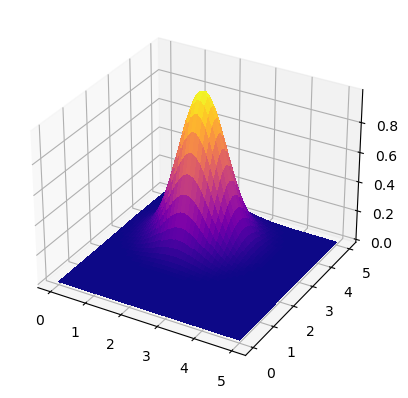

In [11]:

# Create a grid of x and y values using linspace evenly spaced values

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
print(X)

# Define parameters for a 2D Gaussian function
mx = 2
my = 3.5
wx= 0.6
wy= 0.6

# Create a 2D Gaussian surface using the parameters
Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))


# Create a 3D plot of the Gaussian surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)


> * the linspace creates linearly spaced arrray between the start and end points
> * the meshgrid is typically used for plotting and the function is executed for the x,y values of all the points to the function Z 

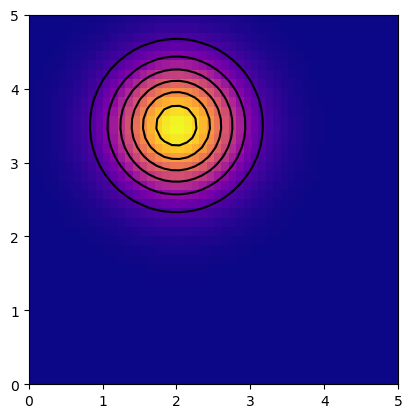

In [12]:
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');

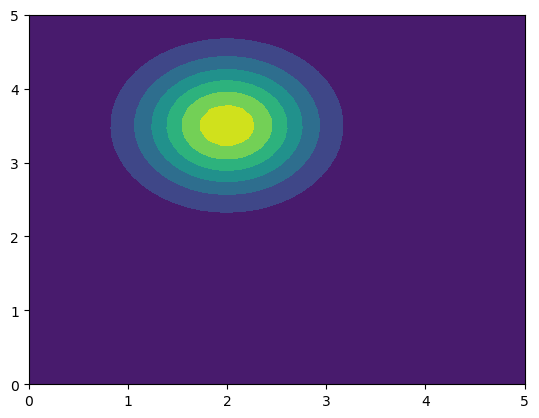

In [13]:
plt.contourf(X, Y, Z)

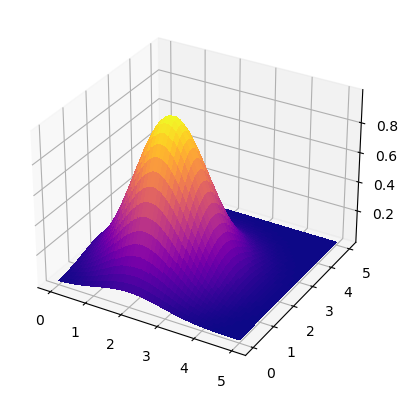

In [14]:
# Define parameters for a 2D Gaussian function different values of mu and sigma
mx = 2
my = 2
wx= 0.9
wy= 0.9

# Create a 2D Gaussian surface using the parameters
Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))


# Create a 3D plot of the Gaussian surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

In [15]:

Z

array([[7.16697504e-03, 9.16149105e-03, 1.15614870e-02, ...,
        6.79235327e-04, 4.74528076e-04, 3.27281023e-04],
       [9.73661503e-03, 1.24462428e-02, 1.57067309e-02, ...,
        9.22767675e-04, 6.44664893e-04, 4.44624031e-04],
       [1.29618617e-02, 1.65690517e-02, 2.09095741e-02, ...,
        1.22843380e-03, 8.58209673e-04, 5.91905420e-04],
       ...,
       [8.12326806e-04, 1.03839133e-03, 1.31041419e-03, ...,
        7.69866033e-05, 5.37844592e-05, 3.70950292e-05],
       [5.20873384e-04, 6.65828584e-04, 8.40252801e-04, ...,
        4.93647042e-05, 3.44872200e-05, 2.37857636e-05],
       [3.27281023e-04, 4.18360905e-04, 5.27957091e-04, ...,
        3.10173862e-05, 2.16693980e-05, 1.49453385e-05]])

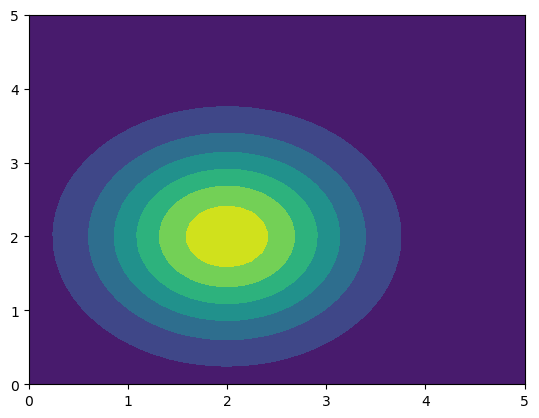

In [16]:
plt.contourf(X, Y, Z)

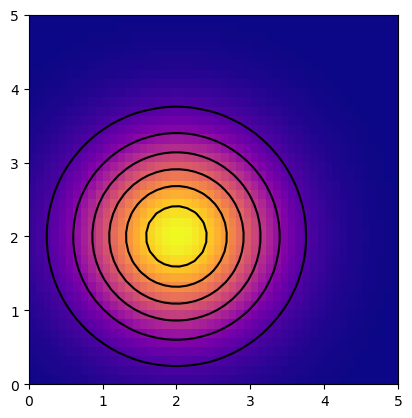

In [17]:
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');

____
![box](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)
## Problem #6 (5pts)

### Violins and Boxes

✍🏻 Run the code below. In a markdown cell explain what the visualizations reveal to you. What story do you get? For example, why do you see the shapes that you see? How do you interpret these shapes? Do these two plots reveal the same information? Which one gives you more information?

For your projects, you will want to choose the best visualization that tells the story you wish to tell.

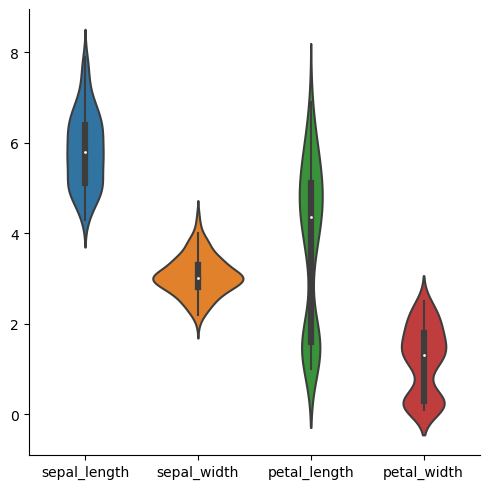

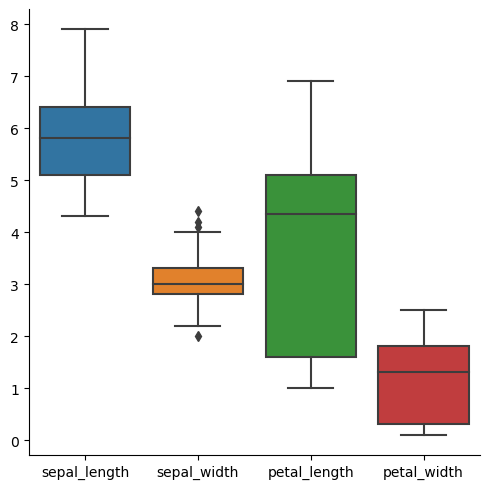

In [18]:
df_iris = sns.load_dataset("iris")

sns.catplot(data=df_iris, kind="violin")
sns.catplot(data=df_iris, kind="box")

> Ill choose the violin plo for this dataset it combines box plot and a kernel density 

> The violin plot shows for each attribute  displays the distribution of of its values for each species, helping visualize differences in distribution shapes among species.

> The box plot provides a concise summary of central tendency and spread for attributes in each species, helps in comparisons. how much the data is grouped on which quartile